In [2]:
# imports
import os
from mpl_toolkits.mplot3d import Axes3D
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns
from sklearn import preprocessing

In [3]:
# read in the asteroids dataset csv file
df = pd.read_csv('./nasa.csv')
df.dataframeName = 'nasa.csv'

In [4]:
df.head(10)

Neo Reference ID     Name  Absolute Magnitude  Est Dia in KM(min)  \
0           3703080  3703080                21.6            0.127220   
1           3723955  3723955                21.3            0.146068   
2           2446862  2446862                20.3            0.231502   
3           3092506  3092506                27.4            0.008801   
4           3514799  3514799                21.6            0.127220   
5           3671135  3671135                19.6            0.319562   
6           2495323  2495323                19.6            0.319562   
7           2153315  2153315                19.2            0.384198   
8           2162463  2162463                17.8            0.732074   
9           2306383  2306383                21.5            0.133216   

   Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
0            0.284472         127.219879         284.472297   
1            0.326618         146.067964         326.617897   
2            0.517654         231.502122         517.654482   
3            0.019681           8.801465          19.680675   
4            0.284472         127.219879         284.472297   
5            0.714562         319.561887         714.562102   
6            0.714562         319.561887         714.562102   
7            0.859093         384.197891         859.092601   
8            1.636967         732.073989        1636.967205   
9            0.297879         133.215567         297.879063   

   Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  ...  \
0               0.079051               0.176763            417.388066  ...   
1               0.090762               0.202951            479.225620  ...   
2               0.143849               0.321655            759.521423  ...   
3               0.005469               0.012229             28.876199  ...   
4               0.079051               0.176763            417.388066  ...   
5               0.198566               0.444008           1048.431420  ...   
6               0.198566               0.444008           1048.431420  ...   
7               0.238729               0.533815           1260.491809  ...   
8               0.454890               1.017164           2401.817627  ...   
9               0.082776               0.185093            437.058960  ...   

   Asc Node Longitude Orbital Period  Perihelion Distance  Perihelion Arg  \
0          314.373913     609.599786             0.808259       57.257470   
1          136.717242     425.869294             0.718200      313.091975   
2          259.475979     643.580228             0.950791      248.415038   
3           57.173266     514.082140             0.983902       18.707701   
4           84.629307     495.597821             0.967687      158.263596   
5          178.971951     556.160556             0.577800      198.145969   
6          178.971953     556.160544             0.577800      198.145960   
7          112.562984     502.808758             0.680905      288.374651   
8           80.211132     447.837013             0.872705      353.422394   
9            2.613682     299.535161             0.393040      253.765937   

   Aphelion Dist  Perihelion Time  Mean Anomaly  Mean Motion  Equinox  \
0       2.005764     2.458162e+06    264.837533     0.590551    J2000   
1       1.497352     2.457795e+06    173.741112     0.845330    J2000   
2       1.966857     2.458120e+06    292.893654     0.559371    J2000   
3       1.527904     2.457902e+06     68.741007     0.700277    J2000   
4       1.483543     2.457814e+06    135.142133     0.726395    J2000   
5       2.069265     2.458009e+06    354.237368     0.647295    J2000   
6       2.069265     2.458009e+06    354.237396     0.647295    J2000   
7       1.794045     2.458242e+06    186.776932     0.715978    J2000   
8       1.418397     2.458222e+06    182.236432     0.803864    J2000   
9       1.359211     2.457901e+06    119.861382     1.201862    J2000   

   Ha

In [5]:
# get number of rows and columns
rows,cols = df.shape
print('Rows: '+str(rows)+' Columns: '+str(cols)+' in this dataset')

Rows: 4687 Columns: 40 in this dataset


In [6]:
df.describe()

Neo Reference ID          Name  Absolute Magnitude  Est Dia in KM(min)  \
count      4.687000e+03  4.687000e+03         4687.000000         4687.000000   
mean       3.272298e+06  3.272298e+06           22.267865            0.204604   
std        5.486011e+05  5.486011e+05            2.890972            0.369573   
min        2.000433e+06  2.000433e+06           11.160000            0.001011   
25%        3.097594e+06  3.097594e+06           20.100000            0.033462   
50%        3.514799e+06  3.514799e+06           21.900000            0.110804   
75%        3.690060e+06  3.690060e+06           24.500000            0.253837   
max        3.781897e+06  3.781897e+06           32.100000           15.579552   

       Est Dia in KM(max)  Est Dia in M(min)  Est Dia in M(max)  \
count         4687.000000        4687.000000        4687.000000   
mean             0.457509         204.604203         457.508906   
std              0.826391         369.573402         826.391249   
min              0.002260           1.010543           2.259644   
25%              0.074824          33.462237          74.823838   
50%              0.247765         110.803882         247.765013   
75%              0.567597         253.837029         567.596853   
max             34.836938       15579.552413       34836.938254   

       Est Dia in Miles(min)  Est Dia in Miles(max)  Est Dia in Feet(min)  \
count            4687.000000            4687.000000           4687.000000   
mean                0.127135               0.284283            671.273653   
std                 0.229642               0.513496           1212.511199   
min                 0.000628               0.001404              3.315431   
25%                 0.020792               0.046493            109.784247   
50%                 0.068850               0.153954            363.529809   
75%                 0.157727               0.352688            832.798679   
max                 9.680682              21.646663          51114.018738   

       ...  Semi Major Axis  Inclination  Asc Node Longitude  Orbital Period  \
count  ...      4687.000000  4687.000000         4687.000000     4687.000000   
mean   ...         1.400264    13.373844          172.157275      635.582076   
std    ...         0.524154    10.936227          103.276777      370.954727   
min    ...         0.615920     0.014513            0.001941      176.557161   
25%    ...         1.000635     4.962341           83.081208      365.605031   
50%    ...         1.240981    10.311836          172.625393      504.947292   
75%    ...         1.678364    19.511681          255.026909      794.195972   
max    ...         5.072008    75.406667          359.905890     4172.231343   

       Perihelion Distance  Perihelion Arg  Aphelion Dist  Perihelion Time  \
count          4687.000000     4687.000000    4687.000000     4.687000e+03   
mean              0.813383      183.932151       1.987144     2.457728e+06   
std               0.242059      103.513035       0.951519     9.442264e+02   
min               0.080744        0.006918       0.803765     2.450100e+06   
25%               0.630834       95.625916       1.266059     2.457815e+06   
50%               0.833153      189.761641       1.618195     2.457973e+06   
75%               0.997227      271.777557       2.451171     2.458108e+06   
max               1.299832      359.993098       8.983852     2.458839e+06   

       Mean Anomaly  Mean Motion  
count   4687.000000  4687.000000  
mean     181.167927     0.738242  
std      107.501623     0.342627  
min        0.003191     0.086285  
25%       87.006918     0.453289  
50%      185.718889     0.712946  
75%      276.531946     0.984669  
max      359.917991     2.039000  

[8 rows x 35 columns]

In [7]:
# find distribution of hazardous and non-hazardous asteroids
print('No. of hazardous asteroids:', df[df['Hazardous'] == True].shape[0])
print('No. of non-hazardous asteroids:', df[df['Hazardous'] == False].shape[0])

No. of hazardous asteroids: 755
No. of non-hazardous asteroids: 3932


In [8]:
# find correlation between hazardous asteroids and other parameters to find out which ones have max correlation
df.corr()['Hazardous']

Neo Reference ID               -0.269028
Name                           -0.269028
Absolute Magnitude             -0.325522
Est Dia in KM(min)              0.132424
Est Dia in KM(max)              0.132424
Est Dia in M(min)               0.132424
Est Dia in M(max)               0.132424
Est Dia in Miles(min)           0.132424
Est Dia in Miles(max)           0.132424
Est Dia in Feet(min)            0.132424
Est Dia in Feet(max)            0.132424
Epoch Date Close Approach      -0.079020
Relative Velocity km per sec    0.191970
Relative Velocity km per hr     0.191970
Miles per hour                  0.191970
Miss Dist.(Astronomical)        0.032407
Miss Dist.(lunar)               0.032407
Miss Dist.(kilometers)          0.032407
Miss Dist.(miles)               0.032407
Orbit ID                        0.247369
Orbit Uncertainity             -0.328721
Minimum Orbit Intersection     -0.288949
Jupiter Tisserand Invariant    -0.003404
Epoch Osculation                0.040940
Eccentricity    

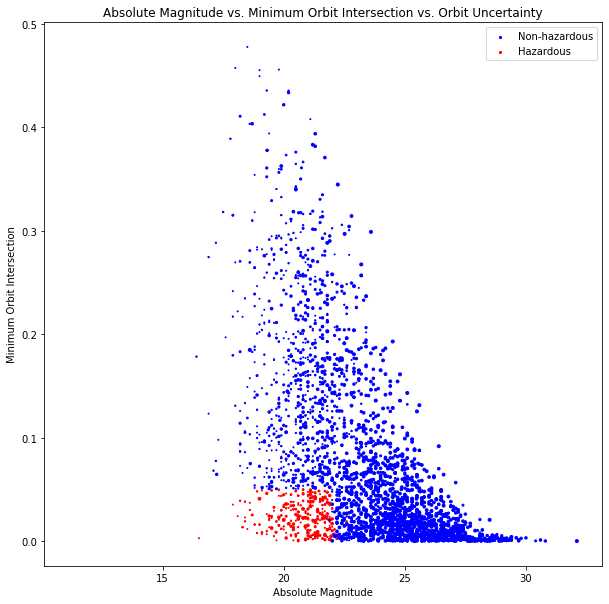

In [9]:
c = df.groupby('Hazardous')
a = c.get_group(0) # non-hazardous
b = c.get_group(1) # hazardous

plt.scatter(a['Absolute Magnitude'],a['Minimum Orbit Intersection'],a['Orbit Uncertainity'],c='b',label='Non-hazardous')
plt.scatter(b['Absolute Magnitude'],b['Minimum Orbit Intersection'],b['Orbit Uncertainity'],c='r',label='Hazardous')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Minimum Orbit Intersection')
plt.title('Absolute Magnitude vs. Minimum Orbit Intersection vs. Orbit Uncertainty')
plt.legend()
plt.show()

In [10]:
# find count of null values, if any
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
Neo Reference ID                4687 non-null int64
Name                            4687 non-null int64
Absolute Magnitude              4687 non-null float64
Est Dia in KM(min)              4687 non-null float64
Est Dia in KM(max)              4687 non-null float64
Est Dia in M(min)               4687 non-null float64
Est Dia in M(max)               4687 non-null float64
Est Dia in Miles(min)           4687 non-null float64
Est Dia in Miles(max)           4687 non-null float64
Est Dia in Feet(min)            4687 non-null float64
Est Dia in Feet(max)            4687 non-null float64
Close Approach Date             4687 non-null object
Epoch Date Close Approach       4687 non-null int64
Relative Velocity km per sec    4687 non-null float64
Relative Velocity km per hr     4687 non-null float64
Miles per hour                  4687 non-null float64
Miss Dist.(Astronomical)        4687

In [12]:
df[['Close Approach Date', 'Orbiting Body','Orbit Determination Date', 'Equinox']].head()


Close Approach Date Orbiting Body Orbit Determination Date Equinox
0          1995-01-01         Earth      2017-04-06 08:36:37   J2000
1          1995-01-01         Earth      2017-04-06 08:32:49   J2000
2          1995-01-08         Earth      2017-04-06 09:20:19   J2000
3          1995-01-15         Earth      2017-04-06 09:15:49   J2000
4          1995-01-15         Earth      2017-04-06 08:57:58   J2000

In [13]:
#unique values
print('Orbiting Body unique values: {}'.format(df['Orbiting Body'].unique()))
print('Equinox unique values: {}'.format(df['Equinox'].unique()))

Orbiting Body unique values: ['Earth']
Equinox unique values: ['J2000']


In [14]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [15]:
# retain only important features
X = df[['Absolute Magnitude', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Epoch Date Close Approach', 'Relative Velocity km per hr',
        'Miles per hour','Miss Dist.(miles)','Orbit Uncertainity','Minimum Orbit Intersection','Jupiter Tisserand Invariant',
        'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination','Asc Node Longitude', 'Orbital Period',
        'Perihelion Distance','Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly','Mean Motion']]
print('The dataset now has the following {} columns: {}'.format(len(X.columns),X.columns))

The dataset now has the following 22 columns: Index(['Absolute Magnitude', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per hr',
       'Miles per hour', 'Miss Dist.(miles)', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion'],
      dtype='object')


In [16]:
# separating Hazardous feature from rest of the dataset
Y = df['Hazardous'].values

In [17]:
# normalization of features
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
print(X[:5])

[[-0.23104209 -0.20941058 -0.20941058 -1.97308738 -1.07713904 -1.07713904
   1.11607503  0.48182219 -0.63171955 -0.34104856  0.3009042   0.23821558
   0.01287488 -0.67195451  1.37719066 -0.07004915 -0.02117222 -1.22388641
   0.01957056  0.45919023  0.77839321 -0.43110028]
 [-0.33482448 -0.15840557 -0.15840557 -1.97308738  0.56814611  0.56814611
   0.8659215  -0.167955    1.15865026  0.3239018   0.3009042  -0.17123418
  -0.5580782   1.37531503 -0.3431925  -0.56539287 -0.39326705  1.24789699
  -0.51480172  0.07081791 -0.06909298  0.31258164]
 [-0.68076581  0.07278876  0.07278876 -1.97003488 -0.8748918  -0.8748918
  -1.41184277 -1.14262078 -0.43484356 -0.40326142  0.3009042  -0.19022296
   0.11173524 -0.83546712  0.84557267  0.02156329  0.56772222  0.62301108
  -0.02132314  0.41557933  1.03940428 -0.52211437]
 [ 1.77541761 -0.52986397 -0.52986397 -1.96698238 -0.38353896 -0.38353896
   0.19579953  0.80671079 -0.85068096  0.02980468  0.3009042  -0.92000153
  -0.27544605 -0.50003839 -1.11347

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3)
print ('Train set: {} entries'.format(X_train.shape[0]))
print ('Test set: {} entries'.format(X_test.shape[0]))

Train set: 3280 entries
Test set: 1407 entries


In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [20]:
Y_pred = decisionTree.predict(X_test)

In [21]:
# evaluate accuracy of model
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, decisionTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.9957356076759062


In [22]:
# evaluating precision, recall, f1-score, support
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['Non-Hazardous','Hazardous']
print(classification_report(Y_test, Y_pred, target_names=target_names))
conf_mat = confusion_matrix(Y_test,Y_pred)
print(conf_mat)

               precision    recall  f1-score   support

Non-Hazardous       1.00      1.00      1.00      1162
    Hazardous       0.99      0.99      0.99       245

     accuracy                           1.00      1407
    macro avg       0.99      0.99      0.99      1407
 weighted avg       1.00      1.00      1.00      1407

[[1159    3]
 [   3  242]]


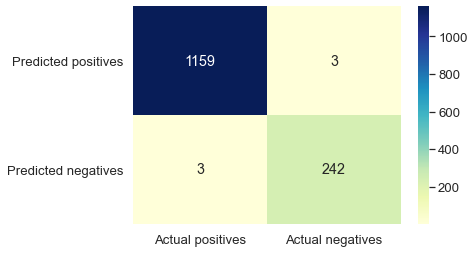

In [23]:
conf_df = pd.DataFrame(conf_mat,index = ['Predicted positives','Predicted negatives'],columns=['Actual positives','Actual negatives'])
sns.set(font_scale=1.2)
sns.heatmap(conf_df,annot=True,fmt="d",cmap="YlGnBu")

[Text(227.18571428571428, 203.85, 'Est Dia in Miles(max) <= -0.359\ngini = 0.263\nsamples = 3280\nvalue = [2770, 510]\nclass = Non-hazardous'),
 Text(203.27142857142857, 176.67000000000002, 'Name <= -0.261\ngini = 0.425\nsamples = 1668\nvalue = [1158, 510]\nclass = Non-hazardous'),
 Text(119.57142857142857, 149.49, 'Neo Reference ID <= -0.041\ngini = 0.02\nsamples = 1169\nvalue = [1157, 12]\nclass = Non-hazardous'),
 Text(71.74285714285715, 122.31, 'Est Dia in KM(min) <= -1.106\ngini = 0.48\nsamples = 25\nvalue = [15, 10]\nclass = Non-hazardous'),
 Text(47.82857142857143, 95.13, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Hazardous'),
 Text(95.65714285714286, 95.13, 'Miss Dist.(lunar) <= 0.879\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = Non-hazardous'),
 Text(71.74285714285715, 67.94999999999999, 'Relative Velocity km per hr <= 0.936\ngini = 0.208\nsamples = 17\nvalue = [15, 2]\nclass = Non-hazardous'),
 Text(47.82857142857143, 40.77000000000001, 'Relative Velocity km p

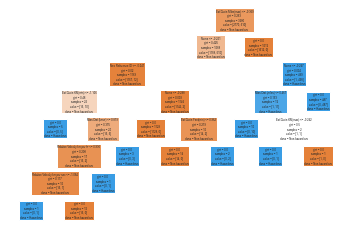

In [24]:
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2))
tree.plot_tree(decisionTree, feature_names=df.columns,class_names=['Non-hazardous','Hazardous'],filled=True)

In [25]:
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(X_train,Y_train)

GaussianNB()

In [26]:
Y_pred = naiveBayes.predict(X_test)

In [27]:
# evaluate accuracy of model
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, decisionTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

Train set Accuracy:  1.0
Test set Accuracy:  0.9431414356787491


In [28]:
# evaluating precision, recall, f1-score, support
from sklearn.metrics import classification_report, confusion_matrix
target_names = ['Non-Hazardous','Hazardous']
print(classification_report(Y_test, Y_pred, target_names=target_names))
conf_mat = confusion_matrix(Y_test,Y_pred)
print(conf_mat)

               precision    recall  f1-score   support

Non-Hazardous       0.98      0.95      0.97      1162
    Hazardous       0.80      0.89      0.85       245

     accuracy                           0.94      1407
    macro avg       0.89      0.92      0.91      1407
 weighted avg       0.95      0.94      0.94      1407

[[1108   54]
 [  26  219]]


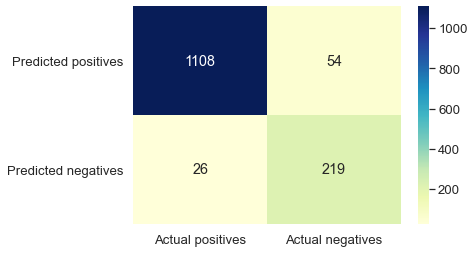

In [29]:
conf_df = pd.DataFrame(conf_mat,index = ['Predicted positives','Predicted negatives'],columns=['Actual positives','Actual negatives'])
sns.set(font_scale=1.2)
sns.heatmap(conf_df,annot=True,fmt="d",cmap="YlGnBu")

In [30]:
# linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
df.corr()['Jupiter Tisserand Invariant']

Neo Reference ID               -0.004854
Name                           -0.004854
Absolute Magnitude              0.238702
Est Dia in KM(min)             -0.133582
Est Dia in KM(max)             -0.133582
Est Dia in M(min)              -0.133582
Est Dia in M(max)              -0.133582
Est Dia in Miles(min)          -0.133582
Est Dia in Miles(max)          -0.133582
Est Dia in Feet(min)           -0.133582
Est Dia in Feet(max)           -0.133582
Epoch Date Close Approach      -0.132728
Relative Velocity km per sec   -0.052294
Relative Velocity km per hr    -0.052294
Miles per hour                 -0.052294
Miss Dist.(Astronomical)        0.093969
Miss Dist.(lunar)               0.093969
Miss Dist.(kilometers)          0.093969
Miss Dist.(miles)               0.093969
Orbit ID                       -0.019595
Orbit Uncertainity             -0.008992
Minimum Orbit Intersection     -0.305849
Jupiter Tisserand Invariant     1.000000
Epoch Osculation                0.051062
Eccentricity    

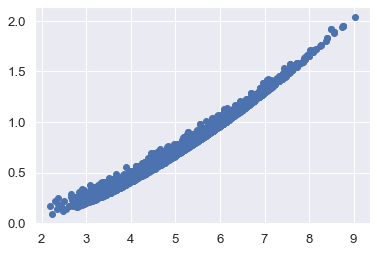

In [32]:
# plot the parameters wth high correlation
X = df['Jupiter Tisserand Invariant'].values
Y = df['Mean Motion'].values
plt.scatter(X,Y)

In [33]:
# splitting data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3)
print ('Train set: {} entries'.format(X_train.shape[0]))
print ('Test set: {} entries'.format(X_test.shape[0]))

Train set: 3280 entries
Test set: 1407 entries


In [34]:
# fitting model to data and calculating RSS
linreg = linear_model.LinearRegression()
linreg.fit(X_train.reshape(-1,1),Y_train.reshape(-1,1))
print('R squared Score: ',linreg.score(X_train.reshape(-1,1),Y_train.reshape(-1,1)))

R squared Score:  0.9857514047513822


In [35]:
# predicting values
Y_pred = linreg.predict(X_test.reshape(-1,1))

In [36]:
print('Coefficients: \n', linreg.coef_)
print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination: ', r2_score(Y_test, Y_pred))

Coefficients: 
 [[0.27603857]]
Mean squared error:  0.0017998281164717305
Coefficient of determination:  0.9845322764096343


No handles with labels found to put in legend.


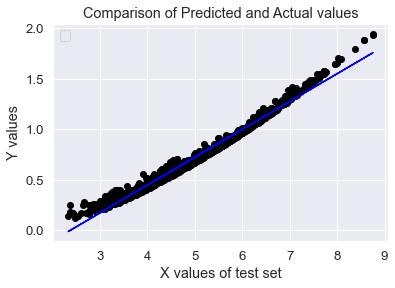

In [42]:
plt.title('Comparison of Predicted and Actual values')
plt.ylabel('Y values')
plt.xlabel('X values of test set')
plt.scatter(X_test,Y_test,color='black')
plt.plot(X_test,Y_pred, color='blue')
plt.show()

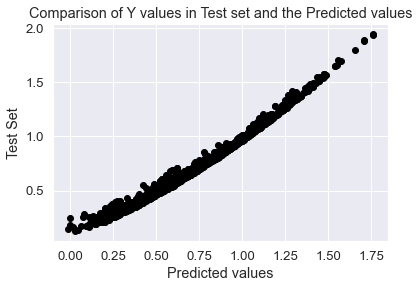

In [38]:
plt.title('Comparison of Y values in Test set and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(Y_pred, Y_test,  color='black')
plt.show()

In [39]:
X_mult = df[['Jupiter Tisserand Invariant','']]

KeyError: "[''] not in index"